## Introduction

This report analyzes survey data to understand Canadians' readiness to resume various activities post-pandemic across different age groups.


## Load the Data

In [164]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)

In [165]:
# Load the data
data <- read.csv("/content/sample_data/ds_research_data.csv", header = TRUE)

In [166]:
head(data)

,gender,birthyear,Province,news_canada_1,news_canada_2,news_canada_3,news_canada_4,news_canada_6,news_canada_7,news_canada_8,⋯,Q96_15,Q96_16,Q96_17,Q96_17_TEXT,Q100,Q100_6_TEXT,Q117.1,Q102,Q110,Q112
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,What is your gender?,Please enter the year you were born:,Province,Which of the following sources of information do you know? - CTV News,Which of the following sources of information do you know? - The CBC,Which of the following sources of information do you know? - The Hill Times,Which of the following sources of information do you know? - MacLeans,Which of the following sources of information do you know? - The Canadian Public Affairs Channel,Which of the following sources of information do you know? - The Globe and Mail,Which of the following sources of information do you know? - The National Post,⋯,"In addition to being Canadian, what is your main ancestry or ethnic group, that is, from which global region did you or your ancestors come from? - Selected Choice - Pacific Islands","In addition to being Canadian, what is your main ancestry or ethnic group, that is, from which global region did you or your ancestors come from? - Selected Choice - I don’t know","In addition to being Canadian, what is your main ancestry or ethnic group, that is, from which global region did you or your ancestors come from? - Selected Choice - Other:","In addition to being Canadian, what is your main ancestry or ethnic group, that is, from which global region did you or your ancestors come from? - Other: - Text",What is your mother tongue? - Selected Choice,What is your mother tongue? - Other: - Text,What best describes your financial situation?,What is your civil status?,"Who did you vote for in the last federal election? If you cannot remember or did not vote, please indicate so.",Who did you vote for in the 2018 Ontario general election?
2,"{""ImportId"":""QID4""}","{""ImportId"":""QID5_TEXT""}","{""ImportId"":""Province""}","{""ImportId"":""QID67"",""choiceId"":""1""}","{""ImportId"":""QID67"",""choiceId"":""2""}","{""ImportId"":""QID67"",""choiceId"":""3""}","{""ImportId"":""QID67"",""choiceId"":""4""}","{""ImportId"":""QID67"",""choiceId"":""6""}","{""ImportId"":""QID67"",""choiceId"":""7""}","{""ImportId"":""QID67"",""choiceId"":""8""}",⋯,"{""ImportId"":""QID114"",""choiceId"":""15""}","{""ImportId"":""QID114"",""choiceId"":""16""}","{""ImportId"":""QID114"",""choiceId"":""17""}","{""ImportId"":""QID114_17_TEXT""}","{""ImportId"":""QID116""}","{""ImportId"":""QID116_6_TEXT""}","{""ImportId"":""QID126""}","{""ImportId"":""QID117""}","{""ImportId"":""QID121""}","{""ImportId"":""QID122""}"
3,Male,1986,Ontario,,,0,,0,,0,⋯,0,0,0,-99,English,-99,Getting ahead with some savings,Married,Liberal Party led by Justin Trudeau,The Progressive Conservative Party led by Doug Ford
4,Male,1978,Ontario,,,0,0,0,,,⋯,0,0,0,-99,English,-99,Just getting by,Common-law,Conservative Party led by Andrew Scheer,The Progressive Conservative Party led by Doug Ford
5,Female,1999,Ontario,CTV News,,,MacLeans,,,0,⋯,0,0,0,-99,English,-99,Getting ahead with some savings,Single,NDP led by Jagmeet Singh,I did not vote
6,Male,1983,BC,0,0,,,0,,The National Post,⋯,0,0,0,-99,English,-99,Getting ahead with some savings,Divorced,I don’t remember,


In [167]:
dim(data)

[1] 1590  129

In [168]:
# Convert all column names to lowercase
colnames(data) <- tolower(colnames(data))

# Display the updated column names to confirm the change
colnames(data)

[1] "gender"         "birthyear"      "province"       "news_canada_1" 
  [5] "news_canada_2"  "news_canada_3"  "news_canada_4"  "news_canada_6" 
  [9] "news_canada_7"  "news_canada_8"  "news_canada_9"  "news_canada_10"
 [13] "news_canada_11" "news_canada_12" "news_canada_13" "news_canada_14"
 [17] "news_canada_15" "news_canada_16" "news_canada_17" "news_canada_18"
 [21] "news_canada_19" "news_canada_20" "news_canada_21" "news_canada_22"
 [25] "news_canada_23" "news_canada_24" "news_canada_25" "news_canada_26"
 [29] "news_canada_27" "news_canada_28" "news_canada_29" "news_trust_1"  
 [33] "news_trust_2"   "news_trust_3"   "news_trust_4"   "news_trust_5"  
 [37] "news_trust_6"   "news_trust_7"   "news_trust_8"   "news_trust_9"  
 [41] "news_trust_10"  "news_trust_11"  "news_trust_12"  "news_trust_13" 
 [45] "news_trust_14"  "news_trust_15"  "news_trust_16"  "news_trust_17" 
 [49] "news_trust_18"  "news_trust_19"  "news_trust_20"  "news_trust_21" 
 [53] "news_trust_22"  "news_trust_23"  "news_trust_24"  "news_trust_25" 
 [57] "news_trust_26"  "news_trust_27"  "news_trust_28"  "q118_1"        
 [61] "q118_2"         "q118_3"         "q118_4"         "q118_5"        
 [65] "q118_6"         "q118_7"         "q118_8"         "q118_9"        
 [69] "q118_10"        "q118_11"        "q118_12"        "q118_13"       
 [73] "q118_14"        "q118_15"        "q118_16"        "q118_17"       
 [77] "q118_18"        "q118_19"        "q118_20"        "q118_21"       
 [81] "q118_22"        "q118_23"        "q118_24"        "q118_25"       
 [85] "q118_26"        "q118_27"        "q118_28"        "whenready_1"   
 [89] "whenready_2"    "whenready_3"    "whenready_4"    "whenready_5"   
 [93] "whenready_6"    "whenready_7"    "whenready_8"    "whenready_9"   
 [97] "whenready_10"   "q113"           "q92"            "q90"           
[101] "q108"           "q108_7_text"    "q104"           "q104_19_text"  
[105] "q104_20_text"   "q88"            "q98"            "q96_1"         
[109] "q96_4"          "q96_5"          "q96_6"          "q96_7"         
[113] "q96_8"          "q96_9"          "q96_10"         "q96_11"        
[117] "q96_12"         "q96_13"         "q96_14"         "q96_15"        
[121] "q96_16"         "q96_17"         "q96_17_text"    "q100"          
[125] "q100_6_text"    "q117.1"         "q102"           "q110"          
[129] "q112"

# Test 1: Demographics

## Exploratory Data Analysis

In [169]:
# Check the structure of the relevant columns: province, gender, birthyear
str(data[, c("province", "gender", "birthyear")])

'data.frame':	1590 obs. of  3 variables:
 $ province : chr  "Province" "{\"ImportId\":\"Province\"}" "Ontario" "Ontario" ...
 $ gender   : chr  "What is your gender?" "{\"ImportId\":\"QID4\"}" "Male" "Male" ...
 $ birthyear: chr  "Please enter the year you were born:" "{\"ImportId\":\"QID5_TEXT\"}" "1986" "1978" ...


Data Cleaning

the columns are stored as character strings.
It looks like the first row of the dataset might be headers or metadata, not actual data values. To clean this up I will remove data rows and convert data types.

In [170]:
# Remove the first two rows that contain metadata
data <- data[-c(1, 2), ]

# Reset row names after removing rows
rownames(data) <- NULL


In [171]:
# Convert the 'birthyear' column to numeric
data$birthyear <- as.numeric(data$birthyear)

In [172]:
# Check the structure of the relevant columns again
str(data[, c("province", "gender", "birthyear")])

'data.frame':	1588 obs. of  3 variables:
 $ province : chr  "Ontario" "Ontario" "Ontario" "BC" ...
 $ gender   : chr  "Male" "Male" "Female" "Male" ...
 $ birthyear: num  1986 1978 1999 1983 1986 ...


checking for missing values

In [173]:
# Check for missing values in each column
num_missing_province <- sum(is.na(data$province))
num_missing_gender <- sum(is.na(data$gender))
num_missing_birthyear <- sum(is.na(data$birthyear))

In [174]:
# Print the number of missing values for each column
cat("Number of missing values in 'province':", num_missing_province, "\n")
cat("Number of missing values in 'gender':", num_missing_gender, "\n")
cat("Number of missing values in 'birthyear':", num_missing_birthyear, "\n")

Number of missing values in 'province': 0 
Number of missing values in 'gender': 0 
Number of missing values in 'birthyear': 0 


Summary Statistics

In [175]:
# Summary statistics for 'province' column
province_summary <- table(data$province)
print(province_summary)


     Alberta           BC     Manitoba NewBrunswick Newfoundland   NovaScotia 
         179          219           57           34           22           44 
     Ontario          PEI       Quebec Saskatchewan  Territories 
         610            7          364           49            3 


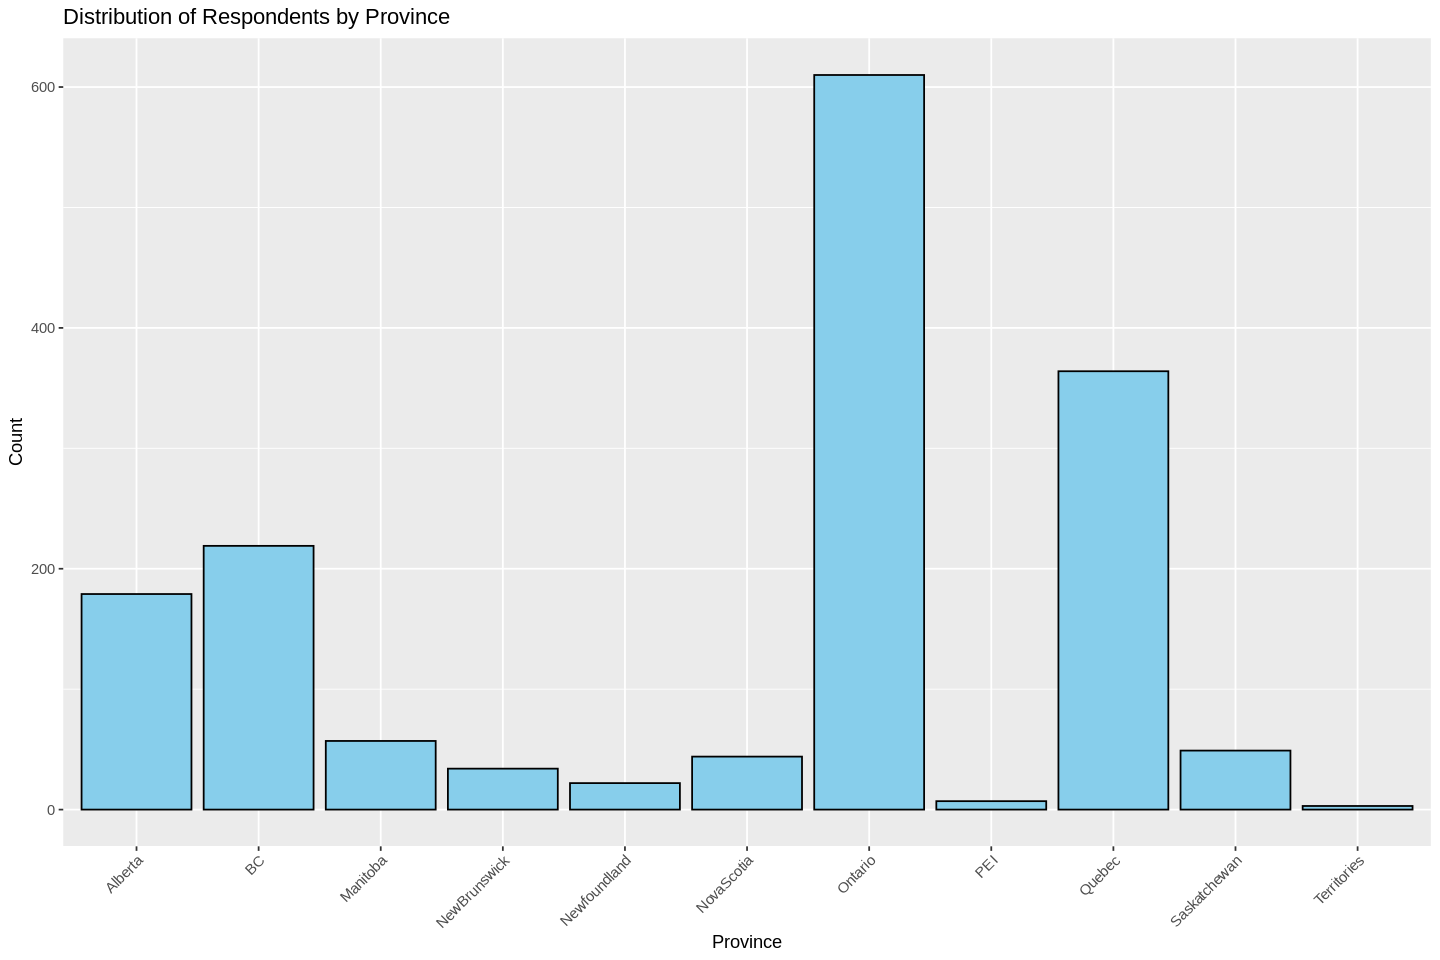

In [176]:
# Plot distribution of province
library(ggplot2)
ggplot(data, aes(x = province)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Distribution of Respondents by Province", x = "Province", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [177]:
# Summary statistics for 'gender' column
gender_summary <- table(data$gender)
print(gender_summary)


             Female I prefer not to say                Male               Other 
                848                   3                 735                   2 


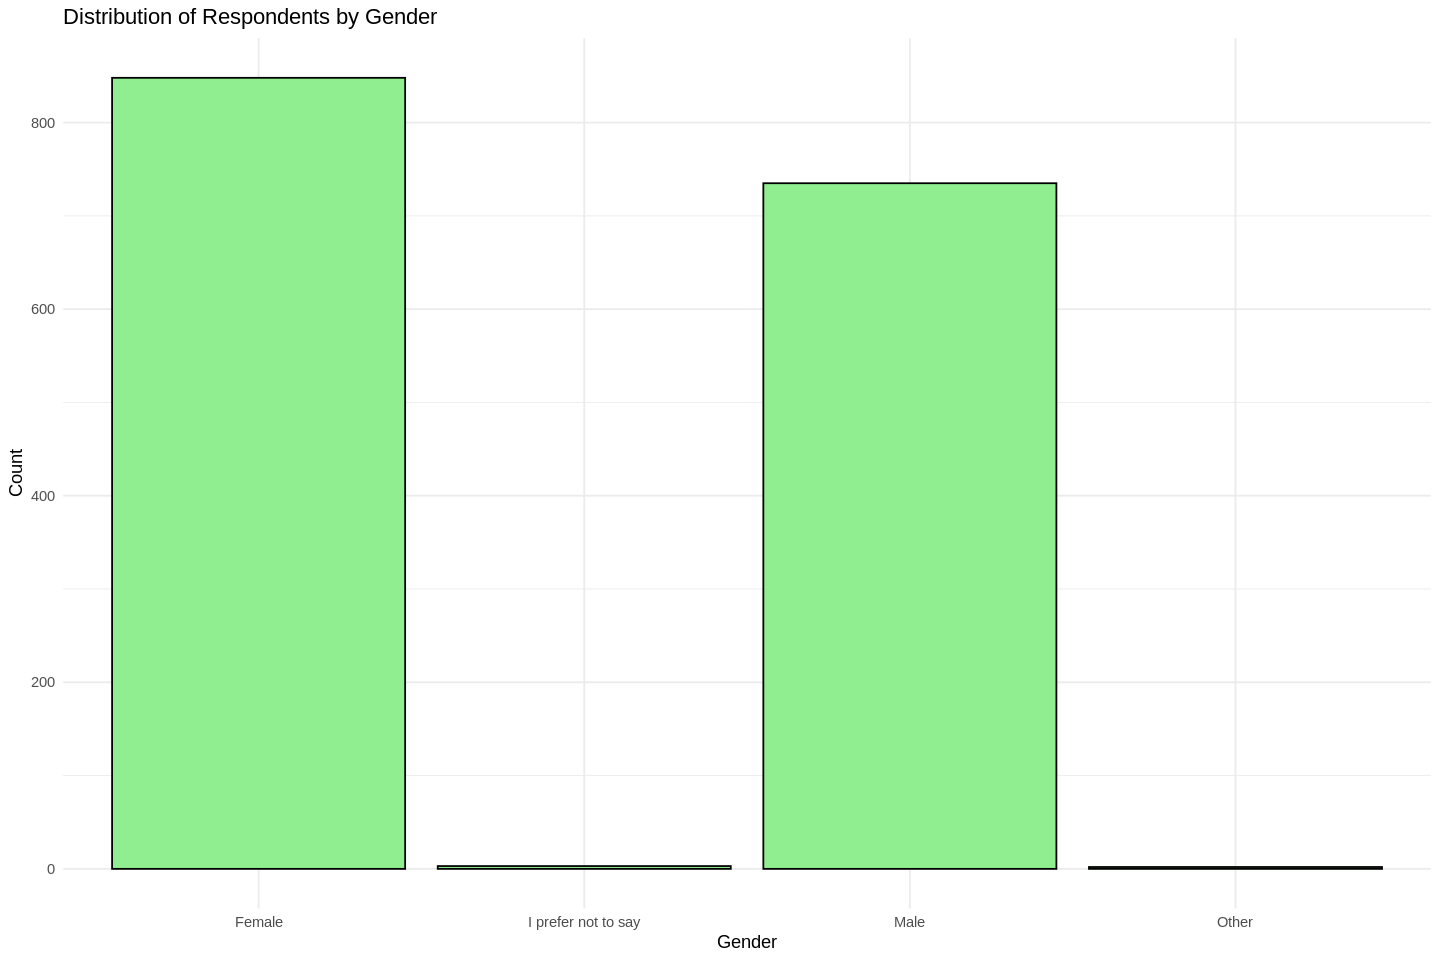

In [178]:
# Plot distribution of gender
ggplot(data, aes(x = gender)) +
  geom_bar(fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Respondents by Gender", x = "Gender", y = "Count") +
  theme_minimal()

In [179]:
# Summary statistics for 'birthyear' column
birthyear_summary <- summary(data$birthyear)
print(birthyear_summary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1932    1956    1970    1970    1984    2002 


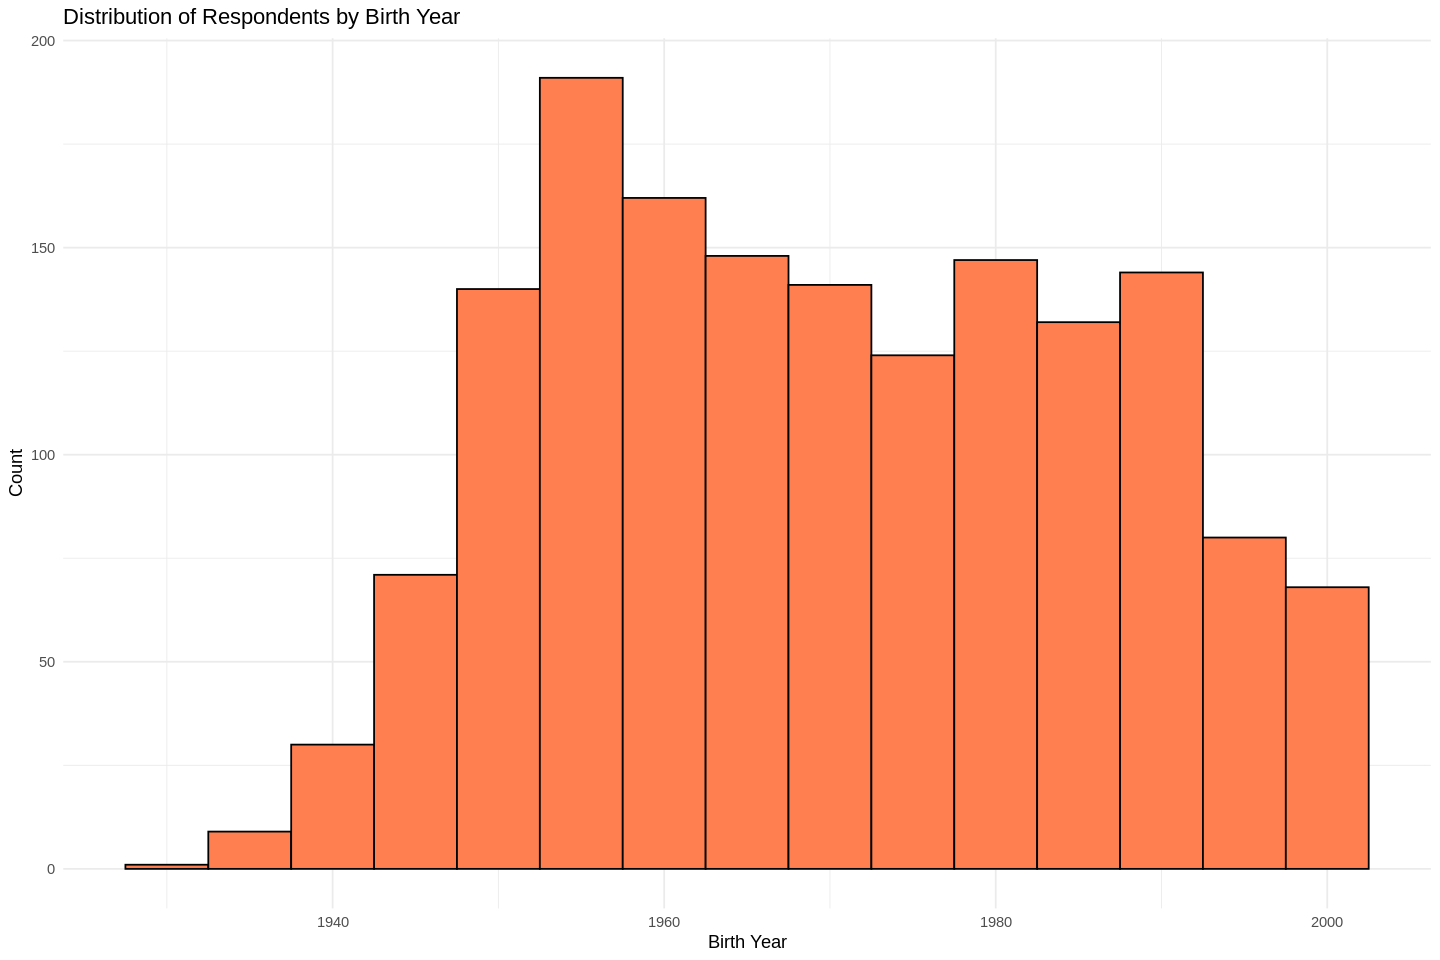

In [180]:
# Plot distribution of birth year
ggplot(data, aes(x = birthyear)) +
  geom_histogram(binwidth = 5, fill = "coral", color = "black") +
  labs(title = "Distribution of Respondents by Birth Year", x = "Birth Year", y = "Count") +
  theme_minimal()

## Replicating the Graph

**gender distribution across different Canadian provinces**

In [181]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)

In [182]:
# Create a subset of the data for provinces (merge BC and Territories) and gender
# Calculate the proportion of male and female respondents by province

gender_province_filtered <- data %>%
  filter(gender %in% c("Male", "Female")) %>%
  mutate(province = ifelse(province %in% c("Territories","BC"), "BC and Territories", province)) %>%
  group_by(province, gender) %>%
  summarise(count = n(), .groups = 'drop') %>%
  ungroup() %>%
  group_by(province) %>%
  mutate(prop = count / sum(count) * 100) %>%
  ungroup()

In [183]:
# Adding a full sample row
full_sample <- gender_province_filtered %>%
  group_by(gender) %>%
  summarise(count = sum(count), .groups = 'drop') %>%
  mutate(province = "Full sample", prop = ceiling(count / sum(count) * 100))

In [184]:
full_sample

gender,count,province,prop
<chr>,<int>,<chr>,<dbl>
Female,848,Full sample,54
Male,735,Full sample,47


In [185]:
# Combine the full sample with the original data
gender_province_combined <- bind_rows(full_sample, gender_province_filtered)

In [186]:
gender_province_combined

gender,count,province,prop
<chr>,<int>,<chr>,<dbl>
Female,848,Full sample,54.00000
Male,735,Full sample,47.00000
Female,91,Alberta,50.83799
Male,88,Alberta,49.16201
Female,113,BC and Territories,50.90090
Male,109,BC and Territories,49.09910
Female,28,Manitoba,49.12281
Male,29,Manitoba,50.87719
Female,20,NewBrunswick,60.60606


In [187]:
# Reshape the dataframe: pivot wider to have Male and Female as columns
gender_province_wide <- gender_province_combined %>%
  select(province, gender, prop) %>%  # Select only the necessary columns
  pivot_wider(names_from = gender, values_from = prop) %>%  # Pivot wider to spread 'gender' into columns
  arrange(province)  # Arrange by province for readability

In [188]:
#sort it
gender_province_wide_sorted <- gender_province_wide %>%
  arrange(province)

In [189]:
gender_province_wide_sorted

province,Female,Male
<chr>,<dbl>,<dbl>
Alberta,50.83799,49.16201
BC and Territories,50.90090,49.09910
Full sample,54.00000,47.00000
Manitoba,49.12281,50.87719
NewBrunswick,60.60606,39.39394
Newfoundland,36.36364,63.63636
NovaScotia,56.81818,43.18182
Ontario,55.18946,44.81054
PEI,57.14286,42.85714


In [190]:
gender_province_combined$province <- factor(gender_province_combined$province,
                                            levels = rev(unique(gender_province_combined$province)))

In [191]:
gender_province_combined

gender,count,province,prop
<chr>,<int>,<fct>,<dbl>
Female,848,Full sample,54.00000
Male,735,Full sample,47.00000
Female,91,Alberta,50.83799
Male,88,Alberta,49.16201
Female,113,BC and Territories,50.90090
Male,109,BC and Territories,49.09910
Female,28,Manitoba,49.12281
Male,29,Manitoba,50.87719
Female,20,NewBrunswick,60.60606


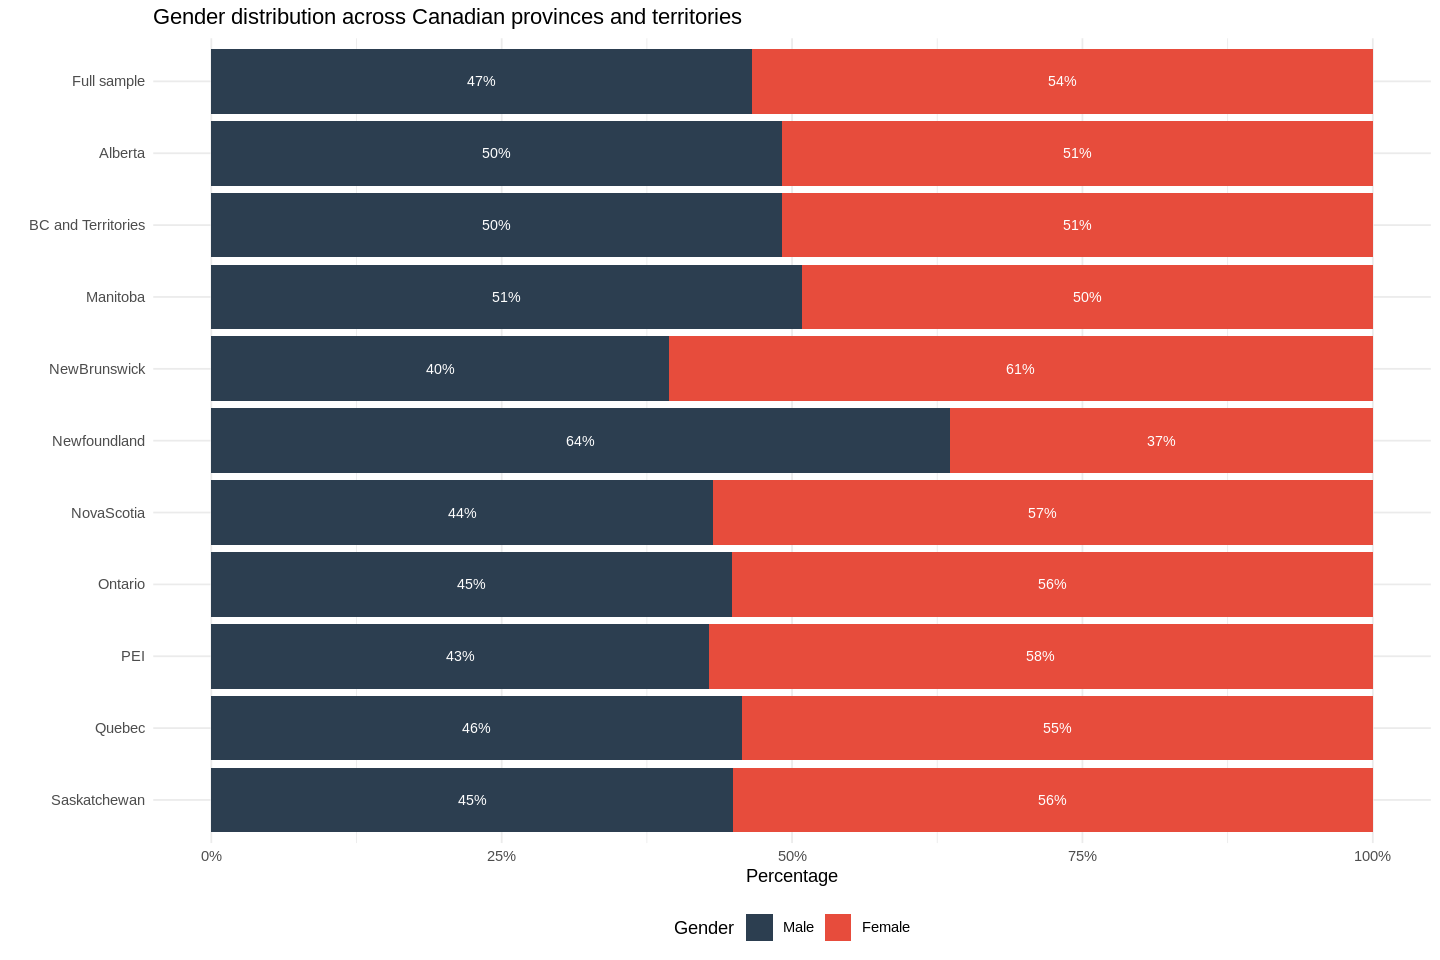

In [192]:
# Plotting the gender distribution across provinces with the reversed order
ggplot(gender_province_combined, aes(x = province, y = prop, fill = gender)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(ceiling(prop), "%")),
            position = position_fill(vjust = 0.5),
            color = "white", size = 3) +
  scale_y_continuous(labels = scales::percent_format()) +
  scale_fill_manual(values = c("Male" = "#2c3e50", "Female" = "#e74c3c"),
                    name = "Gender",
                    breaks = c("Male", "Female"),  # Ensures correct order in legend
                    labels = c("Male", "Female")) +  # Correct labels
  coord_flip() +
  labs(title = "Gender distribution across Canadian provinces and territories",
       x = "", y = "Percentage") +
  theme_minimal() +
  theme(legend.position = "bottom")

The gender distribution graph across Canadian provinces and territories highlights that, on average, there is a slight overrepresentation of females compared to males in the "Full sample" (54% female, 46% male). In Ontario and Quebec, the two most populated provinces in Canada, the gender distribution shows a relatively balanced representation. Some provinces, such as Newfoundland, show a higher proportion of male respondents (64% male), while others, like New Brunswick and Nova Scotia, have a noticeable female majority (61% and 57%, respectively). This variation suggests regional differences in gender distribution, which may reflect demographic characteristics, survey participation rates, or other social factors unique to each province.



1.   Are there any differences between these results and what we should expect from
Canadian statistics and if so, how would you try to correct these differences?
2.   The graph shows the distribution of survey respondents but does not account for the actual population size of each province. Without this context, it’s difficult to assess how representative the survey sample is relative to each province's population.

  Adding an additional layer to the analysis, such as a segmented bar chart by age group, or creating a separate age distribution graph alongside this gender distribution could provide a more comprehensive demographic profile.



# Test 2: when_ready

In [193]:
when_ready_data <- data %>%
  select(gender, birthyear, whenready_1, whenready_2, whenready_3, whenready_4, whenready_5,
         whenready_6, whenready_7, whenready_8, whenready_9, whenready_10)

head(when_ready_data)

,gender,birthyear,whenready_1,whenready_2,whenready_3,whenready_4,whenready_5,whenready_6,whenready_7,whenready_8,whenready_9,whenready_10
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Male,1986,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,In 3-6 months,I am already ready or doing it,I am already ready or doing it,In more than 6 months,I am already ready or doing it
2,Male,1978,In 1-3 months,In more than 6 months,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,In 3-6 months,In more than 6 months,In 3-6 months,In 3-6 months
3,Female,1999,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it
4,Male,1983,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again
5,Male,1986,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,In more than 6 months,In 1-3 months,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again
6,Female,1978,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In 3-6 months


In [194]:
str(when_ready_data)

'data.frame':	1588 obs. of  12 variables:
 $ gender      : chr  "Male" "Male" "Female" "Male" ...
 $ birthyear   : num  1986 1978 1999 1983 1986 ...
 $ whenready_1 : chr  "\t\tIn more than 6 months" "\t\tIn 1-3 months" "\t\tI don’t foresee a time when I will be ready to do it again" "\t\tI don’t foresee a time when I will be ready to do it again" ...
 $ whenready_2 : chr  "\t\tWhen a vaccine will be ready or the virus will have disappeared" "\t\tIn more than 6 months" "\t\tI don’t foresee a time when I will be ready to do it again" "\t\tI don’t foresee a time when I will be ready to do it again" ...
 $ whenready_3 : chr  "\t\tIn more than 6 months" "\t\tIn more than 6 months" "\t\tWhen a vaccine will be ready or the virus will have disappeared" "\t\tI don’t foresee a time when I will be ready to do it again" ...
 $ whenready_4 : chr  "\t\tWhen a vaccine will be ready or the virus will have disappeared" "\t\tIn 3-6 months" "\t\tI don’t foresee a time when I will be ready to do it again"

In [195]:
summary(when_ready_data)

    gender            birthyear    whenready_1        whenready_2       
 Length:1588        Min.   :1932   Length:1588        Length:1588       
 Class :character   1st Qu.:1956   Class :character   Class :character  
 Mode  :character   Median :1970   Mode  :character   Mode  :character  
                    Mean   :1970                                        
                    3rd Qu.:1984                                        
                    Max.   :2002                                        
 whenready_3        whenready_4        whenready_5        whenready_6       
 Length:1588        Length:1588        Length:1588        Length:1588       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

Creating Age Groups

In [196]:
when_ready_data <- when_ready_data %>%
  mutate(age = 2024 - birthyear,  # Assuming current year is 2024
         age_group = case_when(
           age >= 18 & age <= 34 ~ "18-34 years",
           age >= 35 & age <= 49 ~ "35-49 years",
           age >= 50 & age <= 64 ~ "50-64 years",
           age >= 65 ~ "65+ years",
           TRUE ~ "Unknown"  # Handles missing or incorrect values
         ))

In [197]:
# Display the first few rows to check the age groups
head(when_ready_data)

,gender,birthyear,whenready_1,whenready_2,whenready_3,whenready_4,whenready_5,whenready_6,whenready_7,whenready_8,whenready_9,whenready_10,age,age_group
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,Male,1986,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,In 3-6 months,I am already ready or doing it,I am already ready or doing it,In more than 6 months,I am already ready or doing it,38,35-49 years
2,Male,1978,In 1-3 months,In more than 6 months,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,In 3-6 months,In more than 6 months,In 3-6 months,In 3-6 months,46,35-49 years
3,Female,1999,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,25,18-34 years
4,Male,1983,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,41,35-49 years
5,Male,1986,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,In more than 6 months,In 1-3 months,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,38,35-49 years
6,Female,1978,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In 3-6 months,46,35-49 years


In [198]:
when_ready_data %>%
  filter(is.na(age_group) | age_group == "Unknown")

gender,birthyear,whenready_1,whenready_2,whenready_3,whenready_4,whenready_5,whenready_6,whenready_7,whenready_8,whenready_9,whenready_10,age,age_group
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>


Reshape Data

In [199]:
#Add a unique ID for each respondent
when_ready_data <- when_ready_data %>%
  mutate(ID = row_number())

In [200]:
head(when_ready_data)

,gender,birthyear,whenready_1,whenready_2,whenready_3,whenready_4,whenready_5,whenready_6,whenready_7,whenready_8,whenready_9,whenready_10,age,age_group,ID
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
1,Male,1986,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,In 3-6 months,I am already ready or doing it,I am already ready or doing it,In more than 6 months,I am already ready or doing it,38,35-49 years,1
2,Male,1978,In 1-3 months,In more than 6 months,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,In 3-6 months,In more than 6 months,In 3-6 months,In 3-6 months,46,35-49 years,2
3,Female,1999,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,25,18-34 years,3
4,Male,1983,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,41,35-49 years,4
5,Male,1986,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,In more than 6 months,In 1-3 months,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,38,35-49 years,5
6,Female,1978,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In 3-6 months,46,35-49 years,6


In [201]:
when_ready_long <- when_ready_data %>%
  pivot_longer(
    cols = starts_with("whenready_"),
    names_to = "behavior",
    values_to = "readiness"
  )

In [202]:
head(when_ready_long)

gender,birthyear,age,age_group,ID,behavior,readiness
<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>
Male,1986,38,35-49 years,1,whenready_1,In more than 6 months
Male,1986,38,35-49 years,1,whenready_2,When a vaccine will be ready or the virus will have disappeared
Male,1986,38,35-49 years,1,whenready_3,In more than 6 months
Male,1986,38,35-49 years,1,whenready_4,When a vaccine will be ready or the virus will have disappeared
Male,1986,38,35-49 years,1,whenready_5,I am already ready or doing it
Male,1986,38,35-49 years,1,whenready_6,In 3-6 months


In [203]:
str(when_ready_long)

tibble [15,880 × 7] (S3: tbl_df/tbl/data.frame)
 $ gender   : chr [1:15880] "Male" "Male" "Male" "Male" ...
 $ birthyear: num [1:15880] 1986 1986 1986 1986 1986 ...
 $ age      : num [1:15880] 38 38 38 38 38 38 38 38 38 38 ...
 $ age_group: chr [1:15880] "35-49 years" "35-49 years" "35-49 years" "35-49 years" ...
 $ ID       : int [1:15880] 1 1 1 1 1 1 1 1 1 1 ...
 $ behavior : chr [1:15880] "whenready_1" "whenready_2" "whenready_3" "whenready_4" ...
 $ readiness: chr [1:15880] "\t\tIn more than 6 months" "\t\tWhen a vaccine will be ready or the virus will have disappeared" "\t\tIn more than 6 months" "\t\tWhen a vaccine will be ready or the virus will have disappeared" ...


In [204]:
# Reorder columns to ensure 'ID' comes before 'behavior'
when_ready_long <- when_ready_long %>%
  select(ID, birthyear, age, age_group, behavior, readiness)

In [205]:
head(when_ready_long)

ID,birthyear,age,age_group,behavior,readiness
<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1986,38,35-49 years,whenready_1,In more than 6 months
1,1986,38,35-49 years,whenready_2,When a vaccine will be ready or the virus will have disappeared
1,1986,38,35-49 years,whenready_3,In more than 6 months
1,1986,38,35-49 years,whenready_4,When a vaccine will be ready or the virus will have disappeared
1,1986,38,35-49 years,whenready_5,I am already ready or doing it
1,1986,38,35-49 years,whenready_6,In 3-6 months


Convert Responses to Numeric Values

In [206]:
unique(when_ready_long$readiness)

[1] "\t\tIn more than 6 months"                                          
[2] "\t\tWhen a vaccine will be ready or the virus will have disappeared"
[3] "I am already ready or doing it "                                    
[4] "\t\tIn 3-6 months"                                                  
[5] "\t\tIn 1-3 months"                                                  
[6] "\t\tI don’t foresee a time when I will be ready to do it again"     
[7] "Not applicable for me"                                              
[8] ""

In [207]:
#Standardize the responses by trimming whitespace
when_ready_long <- when_ready_long %>%
  mutate(readiness = trimws(readiness))

In [208]:
#Replace emoty space/ NA values in 'readiness' with "Not applicable for me"
when_ready_long <- when_ready_long %>%
  mutate(readiness = ifelse(readiness == "" | is.na(readiness), "Not applicable for me", readiness))

In [209]:
# Convert the responses to numeric values
when_ready_long <- when_ready_long %>%
  mutate(readiness_numeric = case_when(
    readiness == "I am already ready or doing it" ~ 5,
    readiness == "In 1-3 months" ~ 4,
    readiness == "In 3-6 months" ~ 3,
    readiness == "In more than 6 months" ~ 2,
    readiness == "When a vaccine will be ready or the virus will have disappeared" ~ 1,
    readiness == "I don’t foresee a time when I will be ready to do it again" ~ 0,
    readiness == "Not applicable for me" ~ -1,
    TRUE ~ NA_real_  # Handles any unexpected values
  ))

In [210]:
head(when_ready_long)

ID,birthyear,age,age_group,behavior,readiness,readiness_numeric
<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,1986,38,35-49 years,whenready_1,In more than 6 months,2
1,1986,38,35-49 years,whenready_2,When a vaccine will be ready or the virus will have disappeared,1
1,1986,38,35-49 years,whenready_3,In more than 6 months,2
1,1986,38,35-49 years,whenready_4,When a vaccine will be ready or the virus will have disappeared,1
1,1986,38,35-49 years,whenready_5,I am already ready or doing it,5
1,1986,38,35-49 years,whenready_6,In 3-6 months,3


In [211]:
unique(when_ready_long$readiness_numeric)

[1]  2  1  5  3  4  0 -1

### Stacked bar chart

distribution of readiness levels for each behavior across different age groups

In [212]:
options(repr.plot.width = 12, repr.plot.height = 8)

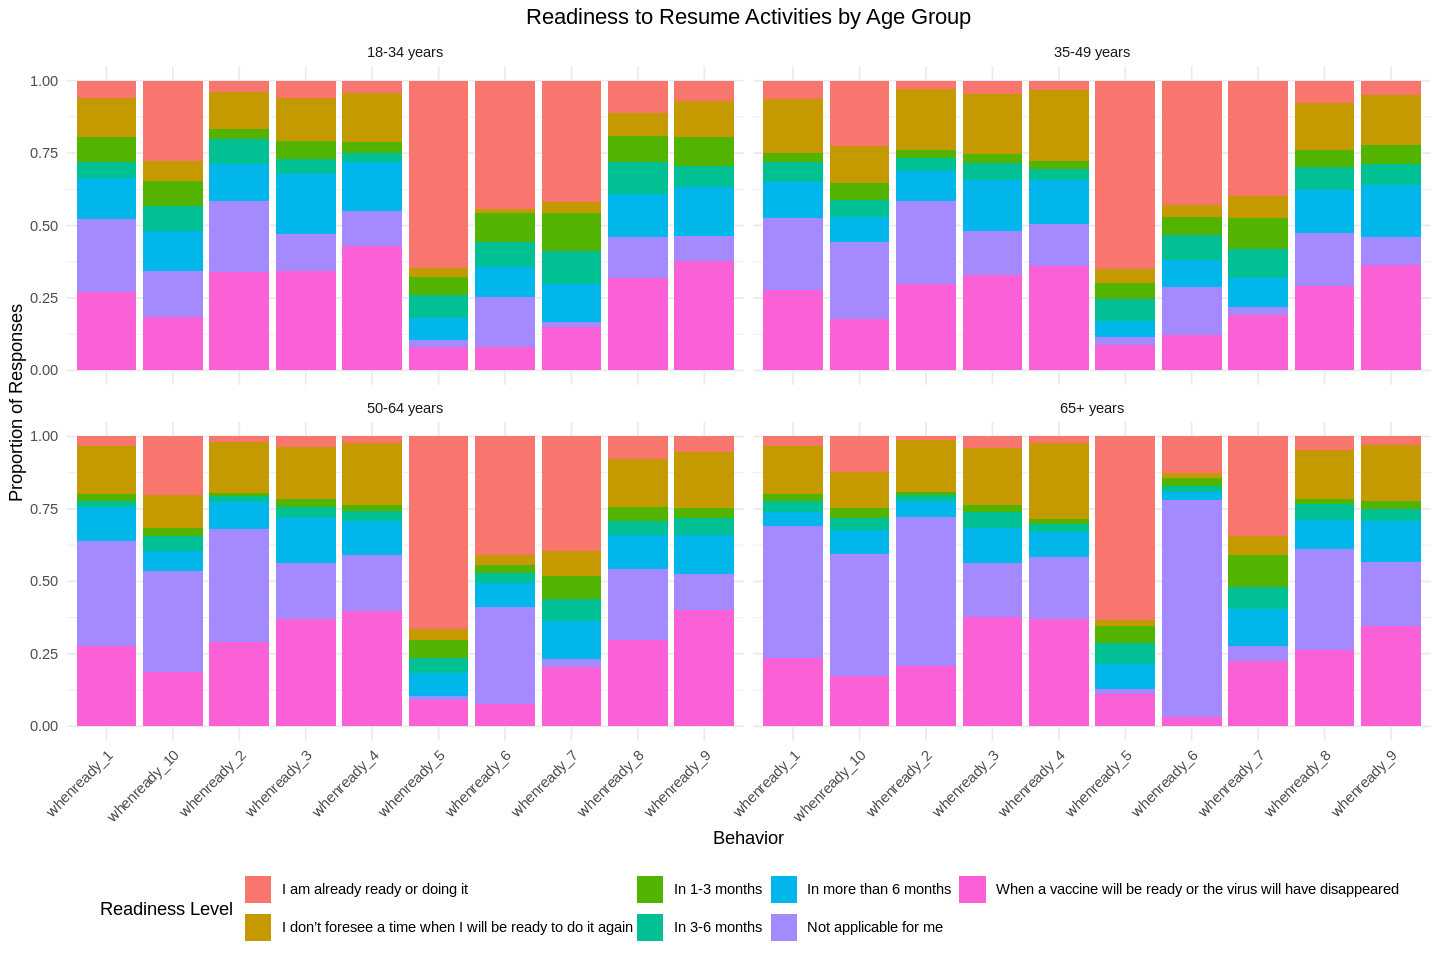

In [213]:
# Stacked bar chart showing readiness across different behaviors and age groups
ggplot(when_ready_long, aes(x = behavior, fill = readiness)) +
  geom_bar(position = "fill") +
  facet_wrap(~ age_group) +
  labs(title = "Readiness to Resume Activities by Age Group",
       x = "Behavior",
       y = "Proportion of Responses",
       fill = "Readiness Level") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "bottom",
        plot.title = element_text(hjust = 0.5))

## Behavior Descriptions

| Behavior Code | Description |
|---------------|-------------|
| `whenready_1` | Travel domestically by plane for business or essential purposes |
| `whenready_2` | Travel internationally by plane for business or essential purposes |
| `whenready_3` | Travel domestically by plane for leisure |
| `whenready_4` | Travel internationally by plane for leisure |
| `whenready_5` | Go shopping in-person at stores or malls |
| `whenready_6` | Return to the workplace |
| `whenready_7` | Go eat in restaurants |
| `whenready_8` | Go to bars, clubs, or crowded spaces |
| `whenready_9` | Attend large public events like a festival or outdoor gathering |
| `whenready_10`| Take public transit |


In [214]:
# Save the plot
ggsave("readiness_by_age_group.png", width = 12, height = 8, dpi = 300)


The stacked bar chart provides a detailed look at readiness levels for various activities across different age groups. Older age groups (50-64 and 65+ years) have a higher proportion of responses in categories like "I don’t foresee a time when I will be ready to do it again" (represented in pink) and "When a vaccine will be ready or the virus will have disappeared" (light blue), especially for high-risk activities such as international travel and attending large public events. In contrast, younger age groups (18-34 and 35-49 years) show more responses indicating they are already ready or will be ready within 1-6 months for various activities, demonstrating less concern or greater willingness to resume normal activities.

## Heatmap

Heatmap of Average Readiness Scores

---


how different age groups feel about resuming various activities. The color intensity represents the average readiness score

In [215]:
#Calculate average readiness score for each behavior and age group
average_readiness <- when_ready_long %>%
  group_by(age_group, behavior) %>%
  summarize(avg_score = round(mean(readiness_numeric, na.rm = TRUE), 2), .groups = "drop")

In [216]:
head(average_readiness)

age_group,behavior,avg_score
<chr>,<chr>,<dbl>
18-34 years,whenready_1,1.12
18-34 years,whenready_10,2.28
18-34 years,whenready_2,0.94
18-34 years,whenready_3,1.35
18-34 years,whenready_4,1.11
18-34 years,whenready_5,3.94


In [217]:
# create heatmap of average readiness scores
heatmap_plot <- ggplot(average_readiness, aes(x = behavior, y = age_group, fill = avg_score)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "yellow", high = "red", name = "Avg Readiness Score") +
  labs(
    title = "Average Readiness to Resume Activities by Age Group",
    x = "Behavior",
    y = "Age Group"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),  # Rotate x-axis labels
    axis.text.y = element_text(size = 12),                         # Increase y-axis text size
    plot.title = element_text(size = 16, hjust = 0.5),             # Center and increase title size
    legend.text = element_text(size = 10),                         # Increase legend text size
    legend.title = element_text(size = 12)                         # Increase legend title size
  )

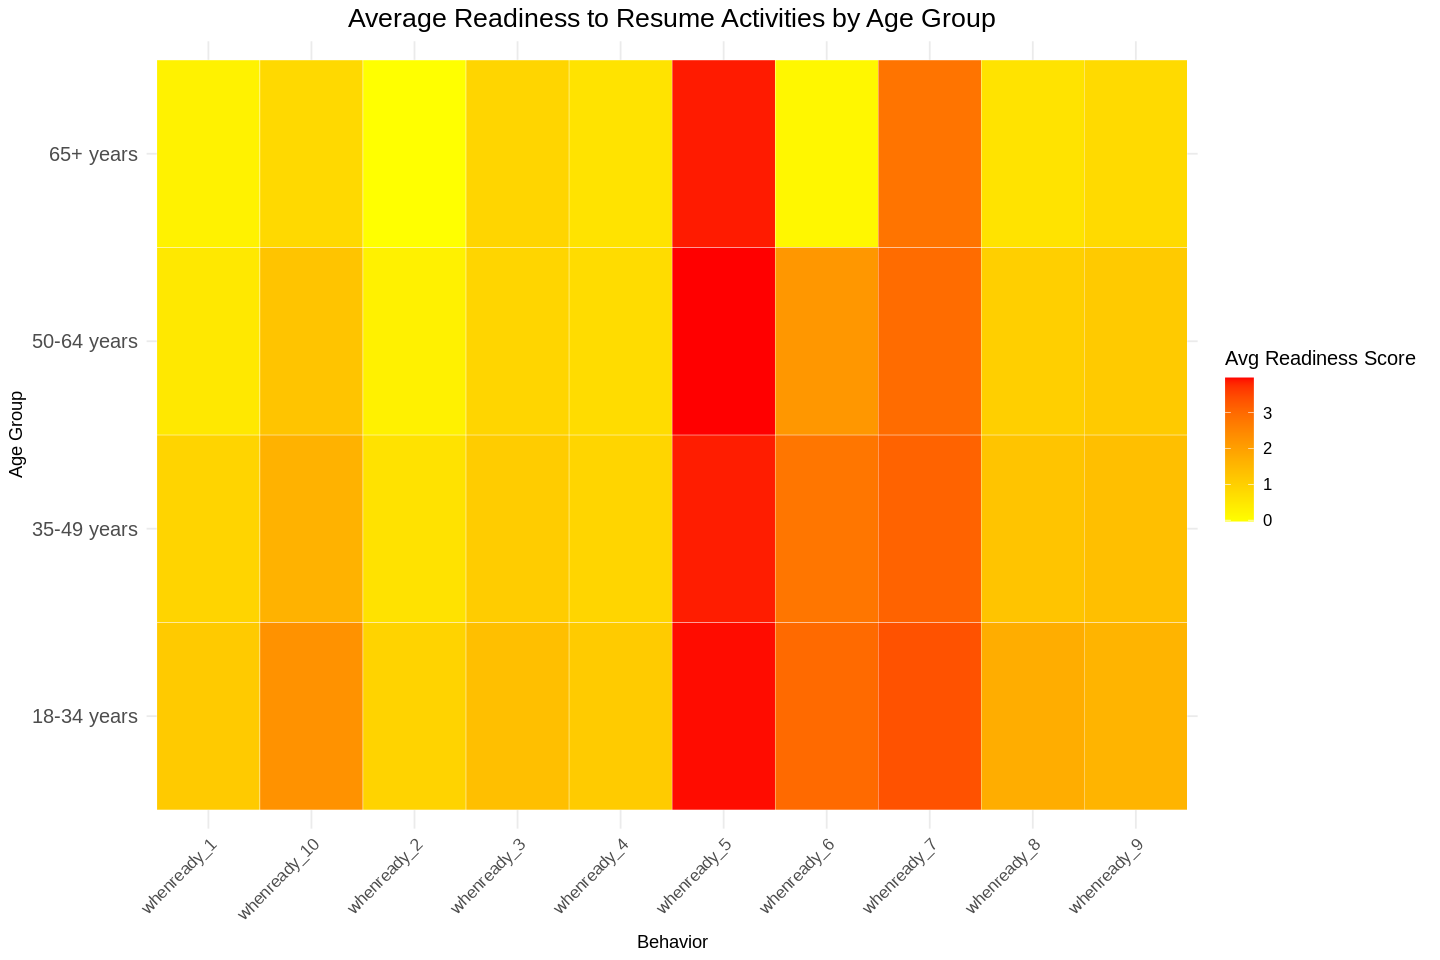

In [218]:
heatmap_plot

## Readiness Level Descriptions

| `readiness_numeric` Value | Readiness Description                                       |
|---------------------------|-------------------------------------------------------------|
| 5                         | I am already ready or doing it                              |
| 4                         | In 1-3 months                                               |
| 3                         | In 3-6 months                                               |
| 2                         | In more than 6 months                                       |
| 1                         | When a vaccine will be ready or the virus will have disappeared |
| 0                         | I don’t foresee a time when I will be ready to do it again  |
| -1                        | Not applicable for me                                       |


In [219]:
ggsave("average_readiness_heatmap.png", plot = heatmap_plot, width = 10, height = 6, dpi = 300)

The heatmap illustrates the average readiness scores for different activities across various age groups. The darkest red color indicates the highest readiness to resume specific activities. Notably, younger age groups (18-34 and 35-49 years) show higher average readiness scores (dark red) for activities like whenready_5 (likely corresponding to "Go shopping in-person at stores or malls") and whenready_6 (which could be "Return to the workplace"), indicating they feel more ready to engage in these activities. In contrast, older age groups (50-64 and 65+ years) show lighter colors across many activities, suggesting a more cautious approach and lower readiness scores. This trend highlights that younger individuals are generally more eager or prepared to return to normal activities, whereas older adults exhibit more hesitation.

# Bonus: Sources of Information

In [220]:
head(data, n = c(1, 35))

,gender,birthyear,province,news_canada_1,news_canada_2,news_canada_3,news_canada_4,news_canada_6,news_canada_7,news_canada_8,⋯,news_canada_24,news_canada_25,news_canada_26,news_canada_27,news_canada_28,news_canada_29,news_trust_1,news_trust_2,news_trust_3,news_trust_4
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Male,1986,Ontario,,,0,,0,,0,⋯,,,,,,,,,,


In [221]:
# Add a unique ID column to the dataset
data <- data %>%
  mutate(ID = row_number())

In [222]:
#Extract and Clean Familiarity Data
familiarity_data <- data %>%
  select(ID, starts_with("news_canada_")) %>%
  pivot_longer(
    cols = starts_with("news_canada_"),
    names_to = "familiarity_source",
    values_to = "source_name"
  ) %>%
  filter(!is.na(source_name) & source_name != "0" & source_name != "")  # Keep only recognized sources

In [223]:
head(familiarity_data)

ID,familiarity_source,source_name
<int>,<chr>,<chr>
1,news_canada_9,Toronto Star
2,news_canada_27,The Wall Street Journal
3,news_canada_1,CTV News
3,news_canada_4,MacLeans
3,news_canada_9,Toronto Star
3,news_canada_24,The New York Times


In [224]:
#Extract and Clean Trust Data
trust_data <- data %>%
  select(ID, starts_with("news_trust_")) %>%
  pivot_longer(
    cols = starts_with("news_trust_"),
    names_to = "trust_source",
    values_to = "trust_value"
  ) %>%
  filter(!is.na(trust_value) & trust_value != "0" & trust_value != "")  # Keep only valid trust responses

In [225]:
head(trust_data, n=12)

ID,trust_source,trust_value
<int>,<chr>,<chr>
1,news_trust_8,Yes
2,news_trust_26,Yes
3,news_trust_1,No
3,news_trust_4,No
3,news_trust_8,No
3,news_trust_23,No
4,news_trust_7,Not sure
4,news_trust_10,Not sure
4,news_trust_11,Not sure


Since the *news_canada_*... columns and *news_trust_*... columns don't align directly, we need to create a mapping manually. This helps us to understand which *news_trust_*... column corresponds to each *news_canada_*... column.
<br>
*news_canada_29*... was not included because there is no entry other than None, 0, and blank.
<br>
*news_canada_5*... is not present in the dataframe

In [226]:
familiarity_columns <- colnames(data)[4:30]
trust_columns <- colnames(data)[32:60]

In [227]:
head(familiarity_columns, n=28)

[1] "news_canada_1"  "news_canada_2"  "news_canada_3"  "news_canada_4" 
 [5] "news_canada_6"  "news_canada_7"  "news_canada_8"  "news_canada_9" 
 [9] "news_canada_10" "news_canada_11" "news_canada_12" "news_canada_13"
[13] "news_canada_14" "news_canada_15" "news_canada_16" "news_canada_17"
[17] "news_canada_18" "news_canada_19" "news_canada_20" "news_canada_21"
[21] "news_canada_22" "news_canada_23" "news_canada_24" "news_canada_25"
[25] "news_canada_26" "news_canada_27" "news_canada_28"

In [228]:
head(trust_columns, n=28)

[1] "news_trust_1"  "news_trust_2"  "news_trust_3"  "news_trust_4" 
 [5] "news_trust_5"  "news_trust_6"  "news_trust_7"  "news_trust_8" 
 [9] "news_trust_9"  "news_trust_10" "news_trust_11" "news_trust_12"
[13] "news_trust_13" "news_trust_14" "news_trust_15" "news_trust_16"
[17] "news_trust_17" "news_trust_18" "news_trust_19" "news_trust_20"
[21] "news_trust_21" "news_trust_22" "news_trust_23" "news_trust_24"
[25] "news_trust_25" "news_trust_26" "news_trust_27" "news_trust_28"

In [229]:
#Create a manual mapping based on the first row inspection
mapping <- data.frame(
  familiarity_source = familiarity_columns,
  trust_source = trust_columns[1:length(familiarity_columns)]
)

In [230]:
print(mapping)

   familiarity_source  trust_source
1       news_canada_1  news_trust_1
2       news_canada_2  news_trust_2
3       news_canada_3  news_trust_3
4       news_canada_4  news_trust_4
5       news_canada_6  news_trust_5
6       news_canada_7  news_trust_6
7       news_canada_8  news_trust_7
8       news_canada_9  news_trust_8
9      news_canada_10  news_trust_9
10     news_canada_11 news_trust_10
11     news_canada_12 news_trust_11
12     news_canada_13 news_trust_12
13     news_canada_14 news_trust_13
14     news_canada_15 news_trust_14
15     news_canada_16 news_trust_15
16     news_canada_17 news_trust_16
17     news_canada_18 news_trust_17
18     news_canada_19 news_trust_18
19     news_canada_20 news_trust_19
20     news_canada_21 news_trust_20
21     news_canada_22 news_trust_21
22     news_canada_23 news_trust_22
23     news_canada_24 news_trust_23
24     news_canada_25 news_trust_24
25     news_canada_26 news_trust_25
26     news_canada_27 news_trust_26
27     news_canada_28 news_t

## Trust Levels for Media Sources

In [231]:
# Merge familiarity data with trust data using the ID column and the mapping
combined_data <- familiarity_data %>%
  inner_join(mapping, by = "familiarity_source") %>%
  inner_join(trust_data, by = c("ID", "trust_source"))

In [232]:
str(combined_data)

tibble [6,739 × 5] (S3: tbl_df/tbl/data.frame)
 $ ID                : int [1:6739] 1 2 3 3 3 3 4 4 4 4 ...
 $ familiarity_source: chr [1:6739] "news_canada_9" "news_canada_27" "news_canada_1" "news_canada_4" ...
 $ source_name       : chr [1:6739] "Toronto Star" "The Wall Street Journal" "CTV News" "MacLeans" ...
 $ trust_source      : chr [1:6739] "news_trust_8" "news_trust_26" "news_trust_1" "news_trust_4" ...
 $ trust_value       : chr [1:6739] "Yes" "Yes" "No" "No" ...


In [233]:
head(combined_data, n= 22)

ID,familiarity_source,source_name,trust_source,trust_value
<int>,<chr>,<chr>,<chr>,<chr>
1,news_canada_9,Toronto Star,news_trust_8,Yes
2,news_canada_27,The Wall Street Journal,news_trust_26,Yes
3,news_canada_1,CTV News,news_trust_1,No
3,news_canada_4,MacLeans,news_trust_4,No
3,news_canada_9,Toronto Star,news_trust_8,No
3,news_canada_24,The New York Times,news_trust_23,No
4,news_canada_8,The National Post,news_trust_7,Not sure
4,news_canada_11,The Vancouver Sun,news_trust_10,Not sure
4,news_canada_12,The Province,news_trust_11,Not sure


In [234]:
unique(trust_data$trust_value)

[1] "Yes"      "No"       "Not sure"

In [235]:
# Summarize the data to count the number of "Yes", "No", and "Not sure" responses for each media source
summary_data <- combined_data %>%
  group_by(source_name) %>%
  summarize(
    familiarity_count = n(),  # Count of recognitions
    trust_yes_count = sum(trust_value == "Yes", na.rm = TRUE),  # Count of "Yes" responses
    trust_no_count = sum(trust_value == "No", na.rm = TRUE),    # Count of "No" responses
    trust_not_sure_count = sum(trust_value == "Not sure", na.rm = TRUE)  # Count of "Not sure" responses
  ) %>%
  arrange(desc(familiarity_count))

In [236]:
str(summary_data)

tibble [27 × 5] (S3: tbl_df/tbl/data.frame)
 $ source_name         : chr [1:27] "Toronto Star" "The CBC" "CTV News" "The Globe and Mail " ...
 $ familiarity_count   : int [1:27] 687 668 650 561 482 380 333 304 302 296 ...
 $ trust_yes_count     : int [1:27] 358 399 460 332 257 229 156 60 64 68 ...
 $ trust_no_count      : int [1:27] 130 107 72 94 80 48 89 78 68 150 ...
 $ trust_not_sure_count: int [1:27] 199 162 118 135 145 103 88 166 170 78 ...


In [237]:
summary_data

source_name,familiarity_count,trust_yes_count,trust_no_count,trust_not_sure_count
<chr>,<int>,<int>,<int>,<int>
Toronto Star,687,358,130,199
The CBC,668,399,107,162
CTV News,650,460,72,118
The Globe and Mail,561,332,94,135
The National Post,482,257,80,145
MacLeans,380,229,48,103
CNN,333,156,89,88
Le Journal de Montréal / Le Journal de Québec,304,60,78,166
La Presse,302,64,68,170


In [238]:
# Reshape data for plotting
trust_plot_data <- summary_data %>%
  pivot_longer(cols = starts_with("trust_"), names_to = "trust_level", values_to = "count")

### Graph: Trust Level

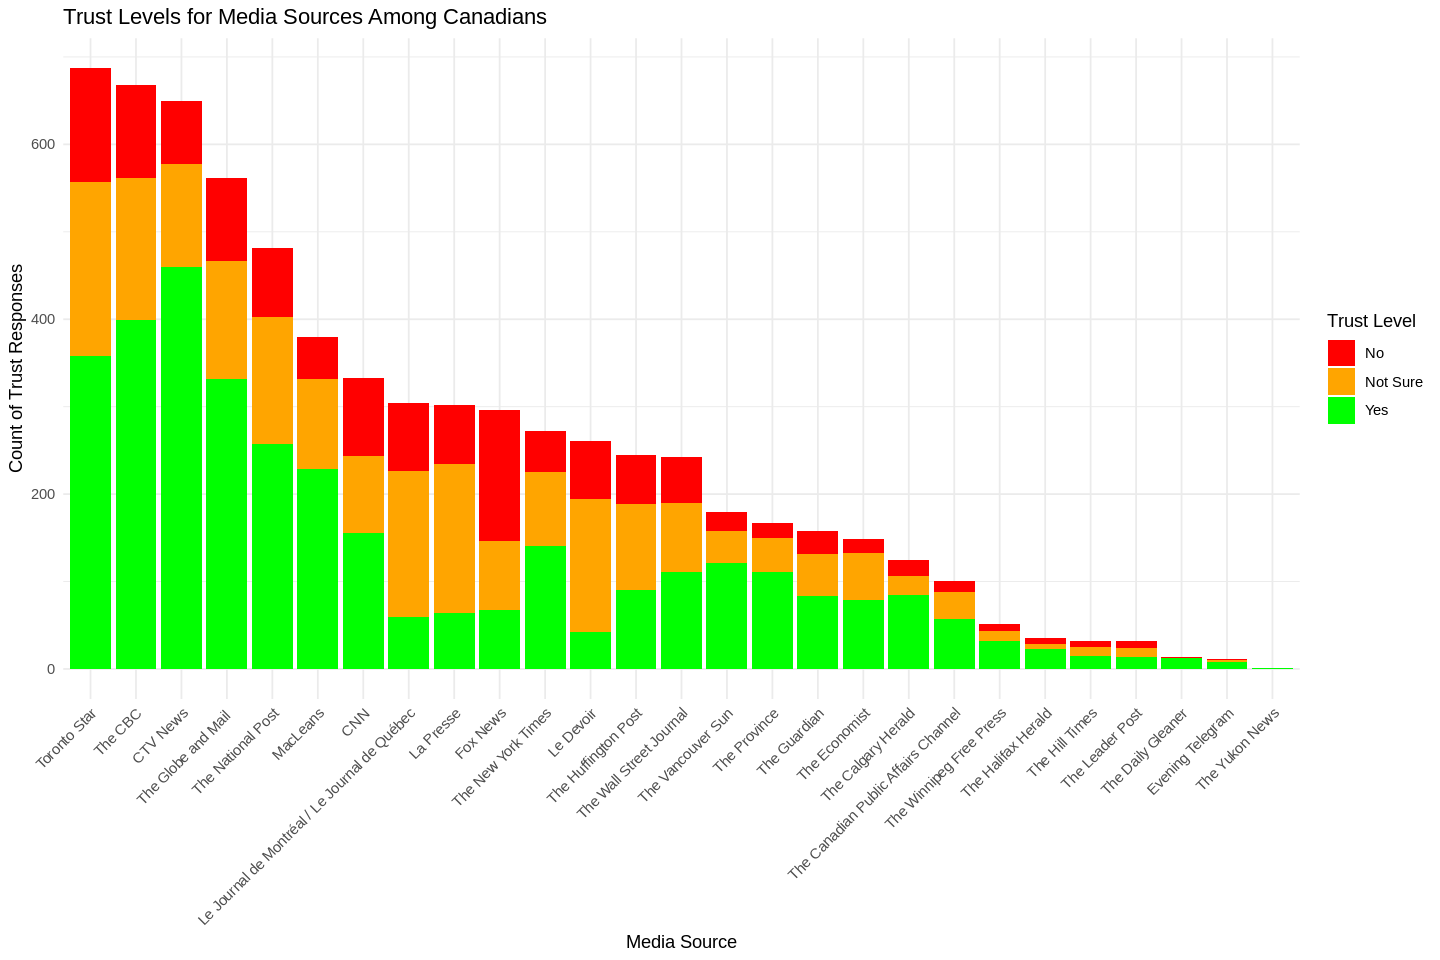

In [256]:
# Plot the data
ggplot(trust_plot_data, aes(x = reorder(source_name, -familiarity_count), y = count, fill = trust_level)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
    title = "Trust Levels for Media Sources Among Canadians",
    x = "Media Source",
    y = "Count of Trust Responses"
  ) +
  scale_fill_manual(values = c("trust_yes_count" = "green", "trust_no_count" = "red", "trust_not_sure_count" = "orange"),
                    name = "Trust Level",
                    labels = c("No", "Not Sure", "Yes")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [257]:
ggsave(filename = "trust_levels_for_media_sources_among_canadians.png", width = 10, height = 6, dpi = 300)

## Trust Level Media Sources by *Age*

In [240]:
birthyear_data <- data %>%
  select(ID, birthyear)

In [241]:
combined_with_birthyear <- combined_data %>%
  inner_join(birthyear_data, by = "ID")

In [242]:
head(combined_with_birthyear)

ID,familiarity_source,source_name,trust_source,trust_value,birthyear
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,news_canada_9,Toronto Star,news_trust_8,Yes,1986
2,news_canada_27,The Wall Street Journal,news_trust_26,Yes,1978
3,news_canada_1,CTV News,news_trust_1,No,1999
3,news_canada_4,MacLeans,news_trust_4,No,1999
3,news_canada_9,Toronto Star,news_trust_8,No,1999
3,news_canada_24,The New York Times,news_trust_23,No,1999


In [243]:
age_summary <- combined_with_birthyear %>%
  group_by(birthyear, source_name) %>%
  summarize(
    familiarity_count = n(),
    trust_yes_count = sum(trust_value == "Yes", na.rm = TRUE),
    trust_no_count = sum(trust_value == "No", na.rm = TRUE),
    trust_not_sure_count = sum(trust_value == "Not sure", na.rm = TRUE),
    .groups = 'drop'  # This removes the grouping after summarizing
  ) %>%
  arrange(desc(familiarity_count))

In [244]:
head(age_summary)

birthyear,source_name,familiarity_count,trust_yes_count,trust_no_count,trust_not_sure_count
<dbl>,<chr>,<int>,<int>,<int>,<int>
1986,Toronto Star,27,15,4,8
1963,The CBC,24,14,4,6
1956,The CBC,23,14,4,5
1989,Toronto Star,22,11,7,4
1954,The CBC,20,11,7,2
1956,Toronto Star,19,9,3,7


In [250]:
age_group_summary <- combined_with_birthyear %>%
  mutate(
    age = 2024 - birthyear,  # Calculate age assuming the current year is 2024
    age_group = case_when(
      age >= 18 & age <= 34 ~ "18-34 years",
      age >= 35 & age <= 49 ~ "35-49 years",
      age >= 50 & age <= 64 ~ "50-64 years",
      age >= 65 ~ "65+ years",
      TRUE ~ "Unknown"  # Handles missing or incorrect values
    )
  ) %>%
  group_by(age_group, source_name) %>%
  summarize(
    familiarity_count = n(),
    trust_yes_count = sum(trust_value == "Yes", na.rm = TRUE),
    trust_no_count = sum(trust_value == "No", na.rm = TRUE),
    trust_not_sure_count = sum(trust_value == "Not sure", na.rm = TRUE),
    .groups = 'drop'  # To remove grouping after summarizing
  )

In [251]:
head(age_group_summary)

age_group,source_name,familiarity_count,trust_yes_count,trust_no_count,trust_not_sure_count
<chr>,<chr>,<int>,<int>,<int>,<int>
18-34 years,CNN,51,27,13,11
18-34 years,CTV News,97,73,7,17
18-34 years,Fox News,42,5,28,9
18-34 years,La Presse,25,12,4,9
18-34 years,Le Devoir,21,7,4,10
18-34 years,Le Journal de Montréal / Le Journal de Québec,22,7,5,10


In [252]:
# Reshape data for plotting with grouped bars
trust_plot_data_age_group <- age_group_summary %>%
  pivot_longer(cols = starts_with("trust_"), names_to = "trust_level", values_to = "count")

### Graph: Trust level by Age

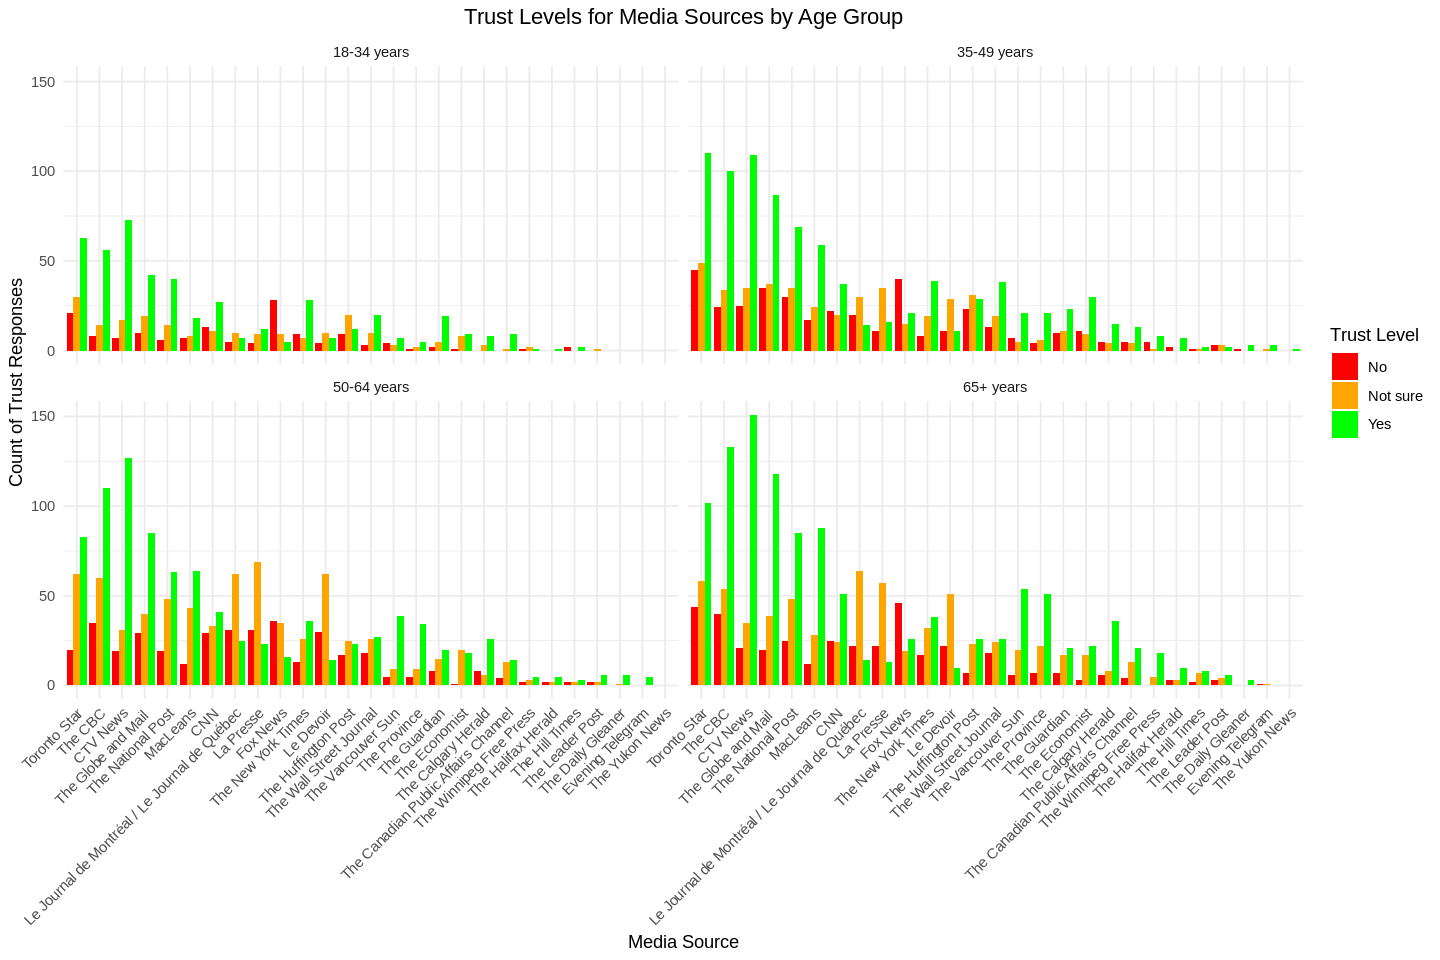

In [274]:
# Plot grouped bar plot with age groups
ggplot(trust_plot_data_age_group, aes(x = reorder(source_name, -familiarity_count), y = count, fill = trust_level)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ age_group) +  # Separate plots for each age group
  labs(
    title = "Trust Levels for Media Sources by Age Group",
    x = "Media Source",
    y = "Count of Trust Responses"
  ) +
  scale_fill_manual(values = c("trust_yes_count" = "green", "trust_no_count" = "red", "trust_not_sure_count" = "orange"),
                    name = "Trust Level",
                    labels = c("No", "Not sure", "Yes")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5)
    )

In [276]:
# Save the last displayed plot directly
ggsave(filename = "trust_levels_by_age_group.png", width = 10, height = 6, dpi = 300)

## Trust Level for Media Source by *Gender*

In [260]:
gender_data <- data %>%
  select(ID, gender)

In [264]:
combined_with_gender <- combined_data %>%
  inner_join(gender_data, by = "ID")

In [265]:
head(combined_with_gender)

ID,familiarity_source,source_name,trust_source,trust_value,gender
<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,news_canada_9,Toronto Star,news_trust_8,Yes,Male
2,news_canada_27,The Wall Street Journal,news_trust_26,Yes,Male
3,news_canada_1,CTV News,news_trust_1,No,Female
3,news_canada_4,MacLeans,news_trust_4,No,Female
3,news_canada_9,Toronto Star,news_trust_8,No,Female
3,news_canada_24,The New York Times,news_trust_23,No,Female


In [266]:
gender_summary <- combined_with_gender %>%
  group_by(gender, source_name) %>%
  summarize(
    familiarity_count = n(),
    trust_yes_count = sum(trust_value == "Yes", na.rm = TRUE),
    trust_no_count = sum(trust_value == "No", na.rm = TRUE),
    trust_not_sure_count = sum(trust_value == "Not sure", na.rm = TRUE),
    .groups = 'drop'  # To remove grouping after summarizing
  )

In [267]:
head(gender_summary)

gender,source_name,familiarity_count,trust_yes_count,trust_no_count,trust_not_sure_count
<chr>,<chr>,<int>,<int>,<int>,<int>
Female,CNN,167,78,40,49
Female,CTV News,324,226,35,63
Female,Evening Telegram,3,3,0,0
Female,Fox News,144,33,68,43
Female,La Presse,158,34,34,90
Female,Le Devoir,138,20,35,83


In [268]:
# Reshape data to a long format for plotting
trust_plot_data_gender <- gender_summary %>%
  pivot_longer(
    cols = starts_with("trust_"),
    names_to = "trust_level",
    values_to = "count"
  )

In [269]:
head(trust_plot_data_gender)

gender,source_name,familiarity_count,trust_level,count
<chr>,<chr>,<int>,<chr>,<int>
Female,CNN,167,trust_yes_count,78
Female,CNN,167,trust_no_count,40
Female,CNN,167,trust_not_sure_count,49
Female,CTV News,324,trust_yes_count,226
Female,CTV News,324,trust_no_count,35
Female,CTV News,324,trust_not_sure_count,63


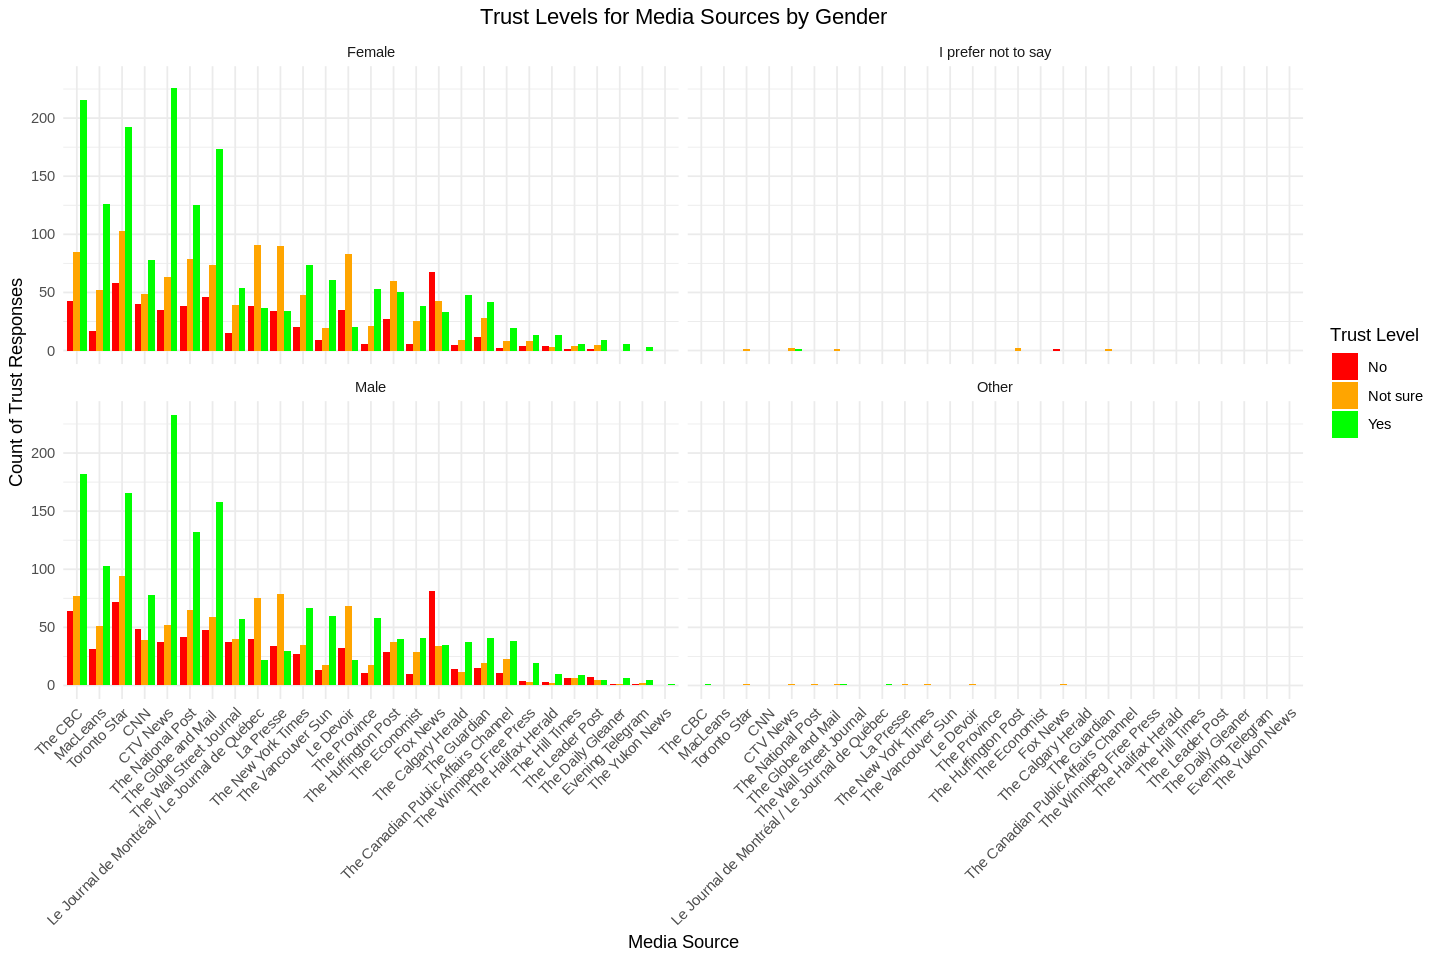

In [275]:
# Plot grouped bar plot with gender
ggplot(trust_plot_data_gender, aes(x = reorder(source_name, -familiarity_count), y = count, fill = trust_level)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ gender) +  # Separate plots for each gender
  labs(
    title = "Trust Levels for Media Sources by Gender",
    x = "Media Source",
    y = "Count of Trust Responses"
  ) +
  scale_fill_manual(values = c("trust_yes_count" = "green", "trust_no_count" = "red", "trust_not_sure_count" = "orange"),
                    name = "Trust Level",
                    labels = c("No", "Not sure", "Yes")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5)  )

In [277]:
# Save the last displayed plot directly
ggsave(filename = "trust_levels_by_gender.png", width = 10, height = 6, dpi = 300)